<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Project title : Game Churn Prediction With Machine Learning**


The game sector is pretty niche, centered around a luxury  product and castwring to a specific subset of customers. As such, it is imperative to maintin customers for a long as possible .

This project is centered around the applicative of ML for Game Churn Prediction . This will provide the ability to predict and prevent customers churn ahead of time

**2. Methodology**





This project will be carried out using CRISP-DM(CRoss Industry Standard Process for Data Mining) methodology. This is one of the more populate data science methodologies and is characterized by six importantes phases, which are as follows:


1.   Bussiness Understanding

2.   Data Understanding


3.   Data Preparation

4.   Data Modelling


5.   Model Evaluation, and

6.   Model Deployment



**3. Tools **

The tools of use in this project include :


1.   Pandas

2.   Numpy

3.   Matplotlib & Seaborn

4.   Sci-kit learn



3.1.   Pandas & Numpy

Pandas is a Python library built upon the Numpy library . The idea behind Pandas is  to be able operate on text data, where Numpy is best suited for numerical operations, inspective of the fact that it can represent text to some degree


3.2.  **Matplotlib & Seaborn**

**Matplotlib** and **Seaborn** are Python libraries for data visualization. Other alternatives include **Bokech** and **Plotly**


3.3.  **Sci-kit learn**

**Sci-kit learn** is a Python library for Machine Learning and data modeling . It provides a lot of utilities and algorithmic implementations for a variety of ML tasks such as classification, regression, outlier detection, and clustering






<h1>Project Implementation via CRISP-DM</h1>



01.   **Business Understanding**

**GameHaven inc** is a populargaming compaany, offering a lot of games types and products to their customers. They are looking to make the most profit possible from the gaming sector and since this is pretty niche  sector which caters to niche customers, their aim is to **minimize the customer rate of churn**.

The fist step of this step is to develop ML models that can predict that can predict a customer's likelihood of churning. With this information in hand, **GameHaven** can then put measures in place to disourage ths customer(s) from churning . Such measures would usually take the from of some  of kind of incentive

The ability to predict customer churn ahead of time would be  an immense  boon to them in the following :


1.   Provide a means of monitoring and observing customer satisfaction

2.   Improve the compan's ability to anticipate customer likes and dislikes

3.  Improve profit margins by improving customer retention


02.   **Data Understanding**

With the **Business Understanding** out of the way, the next step is to understand the data  to be obtained and used for the task. This will involve the pocess of **Exploratory Data Analysis(EDA)**

EDA is a process of sifting through data with the goal of extracting insights. These insights allow a better understanding of the available data and what  can be done with it.
They can also be used for guided preparation of the dataset in the appropriate manner. Just like regular analysis,EDA begins with aet of **questions** and/or **hypotheses**. The EDA process will then prove or disprove these hypotheses, and hopefully, reveal other points of inquiry along the way.

The required libraries and packages are imported first. EDA process is carried out here as shown below. The high-level steps to follow are :    



1.   Import the required libraries
2.   Load in the dataset
3.   Analyze and observe its properties


        *   Missing data
        *   Inconsistent values
        *   Low cartegorical cardinality
        *   Feature correlations

4.   Report on these properties and how they might affect our final solution





In [1]:
# import required utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gc
sns.set() # set visual theme


In [2]:
# seed for reproductibility
SEED = np.random.seed(seed = 2023)

In [3]:
# import dataset
!pip install gdown
# importing gdown
import gdown

#https://drive.google.com/file/d/1mxirYtNrRjq5jt1UdI81FvHX9h9sKYMN/view?usp=sharing
file1_id = "1mxirYtNrRjq5jt1UdI81FvHX9h9sKYMN" # using actual id
#output_file
output_file1 = "Historical Demand Data.csv"
#download  the file
gdown.download(id=file1_id, output=output_file1, quiet=False)

df = pd.read_csv(output_file1)


Downloading...
From (original): https://drive.google.com/uc?id=1mxirYtNrRjq5jt1UdI81FvHX9h9sKYMN
From (redirected): https://drive.google.com/uc?id=1mxirYtNrRjq5jt1UdI81FvHX9h9sKYMN&confirm=t&uuid=8694f142-87bb-467e-98d7-851fd31be24e
To: /content/Historical Demand Data.csv
100%|██████████| 222M/222M [00:06<00:00, 33.2MB/s]


In [4]:
# peek at the dataset
df.head()

,user_id,level_id,attempt_result,attempt_duration,f_reststep,extra_help_used,time,avg_attempt_duration,avg_clearance_rate,avg_clearance_duration,avg_num_retries,label
0,10932,1,1,127.0,0.500000,0,2020-02-01 00:05:51,39.889940,0.944467,35.582757,0.017225,0.0
1,10932,2,1,69.0,0.703704,0,2020-02-01 00:08:01,60.683975,0.991836,56.715706,0.004638,0.0
2,10932,3,1,67.0,0.560000,0,2020-02-01 00:09:50,76.947355,0.991232,71.789943,0.004480,0.0
3,10932,4,1,58.0,0.700000,0,2020-02-01 00:11:16,58.170347,0.993843,54.842882,0.004761,0.0
4,10932,5,1,83.0,0.666667,0,2020-02-01 00:13:12,101.784577,0.954170,85.650547,0.027353,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755675 entries, 0 to 1755674
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   level_id                int64  
 2   attempt_result          int64  
 3   attempt_duration        float64
 4   f_reststep              float64
 5   extra_help_used         int64  
 6   time                    object 
 7   avg_attempt_duration    float64
 8   avg_clearance_rate      float64
 9   avg_clearance_duration  float64
 10  avg_num_retries         float64
 11  label                   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 160.7+ MB


In [6]:
# feature cardinality
df.nunique()

user_id                    10816
level_id                    1295
attempt_result                 2
attempt_duration             600
f_reststep                   603
extra_help_used                2
time                      306832
avg_attempt_duration        1292
avg_clearance_rate          1270
avg_clearance_duration      1258
avg_num_retries             1134
label                          2
dtype: int64

In [7]:
# describe data
df.describe(include="all")

,user_id,level_id,attempt_result,attempt_duration,f_reststep,extra_help_used,time,avg_attempt_duration,avg_clearance_rate,avg_clearance_duration,avg_num_retries,label
count,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06,1755675,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,306832,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01 17:33:29,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,122,NaN,NaN,NaN,NaN,NaN
mean,8.099337e+03,9.722270e+01,5.273476e-01,1.080458e+02,1.677537e-01,4.400815e-02,NaN,3.118494e+02,6.850911e-01,1.111612e+02,1.243980e+00,1.815769e-01
std,3.176117e+03,8.282797e+01,4.992517e-01,5.359588e+01,2.262675e-01,2.051133e-01,NaN,1.887533e+02,2.062641e-01,2.263581e+01,1.484613e+00,3.854955e-01
min,2.774000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,3.988994e+01,3.333333e-02,3.558276e+01,0.000000e+00,0.000000e+00
25%,5.347000e+03,4.100000e+01,0.000000e+00,7.700000e+01,0.000000e+00,0.000000e+00,NaN,1.728224e+02,5.224837e-01,1.001515e+02,1.570054e-01,0.000000e+00
50%,8.063000e+03,8.100000e+01,1.000000e+00,1.000000e+02,4.545455e-02,0.000000e+00,NaN,2.675890e+02,7.164306e-01,1.116680e+02,6.222222e-01,0.000000e+00
75%,1.090900e+04,1.430000e+02,1.000000e+00,1.270000e+02,2.857143e-01,0.000000e+00,NaN,4.238776e+02,8.466758e-01,1.242165e+02,1.848445e+00,0.000000e+00


In [8]:
# More info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755675 entries, 0 to 1755674
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   level_id                int64  
 2   attempt_result          int64  
 3   attempt_duration        float64
 4   f_reststep              float64
 5   extra_help_used         int64  
 6   time                    object 
 7   avg_attempt_duration    float64
 8   avg_clearance_rate      float64
 9   avg_clearance_duration  float64
 10  avg_num_retries         float64
 11  label                   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 160.7+ MB


In [9]:
# Convert time feature to datetime
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755675 entries, 0 to 1755674
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 int64         
 1   level_id                int64         
 2   attempt_result          int64         
 3   attempt_duration        float64       
 4   f_reststep              float64       
 5   extra_help_used         int64         
 6   time                    datetime64[ns]
 7   avg_attempt_duration    float64       
 8   avg_clearance_rate      float64       
 9   avg_clearance_duration  float64       
 10  avg_num_retries         float64       
 11  label                   float64       
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 160.7 MB


In [11]:
# maximum date
df['time'].max()

Timestamp('2020-02-04 23:59:59')

In [12]:
# minimun date
df['time'].min()

Timestamp('2020-02-01 00:00:20')

In [13]:
df.columns

Index(['user_id', 'level_id', 'attempt_result', 'attempt_duration',
       'f_reststep', 'extra_help_used', 'time', 'avg_attempt_duration',
       'avg_clearance_rate', 'avg_clearance_duration', 'avg_num_retries',
       'label'],
      dtype='object')

In [14]:
# check for missing values
# what percentage of different features are missing ?

100 * df.isnull().sum() / len(df)


user_id                   0.0
level_id                  0.0
attempt_result            0.0
attempt_duration          0.0
f_reststep                0.0
extra_help_used           0.0
time                      0.0
avg_attempt_duration      0.0
avg_clearance_rate        0.0
avg_clearance_duration    0.0
avg_num_retries           0.0
label                     0.0
dtype: float64

In [15]:
# Invariant features
# Invariant features are features that do not change
invariant_features = df.nunique()[df.nunique() < 2].index.tolist()

In [16]:
invariant_features

[]

In [17]:
# Duplicated records
num_duplicates = len(df.loc[df.duplicated()])

In [18]:
num_duplicates

55855

In [19]:
df.shape

(1755675, 12)

In [20]:
## feature correlations
df.corr()

,user_id,level_id,attempt_result,attempt_duration,f_reststep,extra_help_used,time,avg_attempt_duration,avg_clearance_rate,avg_clearance_duration,avg_num_retries,label
user_id,1.000000,-0.024543,0.011090,0.001073,0.019765,-0.003126,0.099607,-0.022750,0.022836,-0.005910,-0.025497,0.003997
level_id,-0.024543,1.000000,-0.351085,-0.017585,-0.277967,-0.006705,0.500528,0.740798,-0.768330,0.263597,0.751353,-0.156240
attempt_result,0.011090,-0.351085,1.000000,-0.072602,0.499999,0.087888,-0.309963,-0.426826,0.479145,-0.239651,-0.410893,0.090530
attempt_duration,0.001073,-0.017585,-0.072602,1.000000,-0.388475,0.155447,0.085863,0.066127,-0.029756,0.379374,-0.056339,-0.028819
f_reststep,0.019765,-0.277967,0.499999,-0.388475,1.000000,-0.056618,-0.285306,-0.345983,0.416026,-0.394046,-0.260471,0.101196
extra_help_used,-0.003126,-0.006705,0.087888,0.155447,-0.056618,1.000000,0.015773,-0.006622,-0.002532,0.042458,-0.015655,0.011804
time,0.099607,0.500528,-0.309963,0.085863,-0.285306,0.015773,1.000000,0.534239,-0.556847,0.251594,0.501720,-0.156885
avg_attempt_duration,-0.022750,0.740798,-0.426826,0.066127,-0.345983,-0.006622,0.534239,1.000000,-0.912709,0.516279,0.910498,-0.158949
avg_clearance_rate,0.022836,-0.768330,0.479145,-0.029756,0.416026,-0.002532,-0.556847,-0.912709,1.000000,-0.416900,-0.901514,0.168082
avg_clearance_duration,-0.005910,0.263597,-0.239651,0.379374,-0.394046,0.042458,0.251594,0.516279,-0.416900,1.000000,0.270722,-0.095981


**Visualization and Further Analysis**

Our understanding of dataset can be boosted using visualization technique . Topics that might be interest to us to the dataset include :    



1.   Unique level in the game and distribution of payer levels

2.   The level outcomes (i.e, did the player attempt to clear the level end in success or failure ? )

3.   THe average clearance  rate of players

4.   The average duration of :

    A.   Player attempts and

    B.   Successful clearance

5.   Evolution of player population over :

    A.   Time and

    B.   Attempts results


6.   Player churn category and over time

7.   The average duration per game level  :

    A.   Player attempts and

    B.   Successful clearance

8.   Average attempt duration with  respect to different attempt outcomes  

9.   Player churn per game level :

    A.   Churn count
    
    B.   Churn rate

10.   Label imbalance   

11.   Feature correlation









In [21]:
## unique level in the game
df['level_id'].nunique()

1295

In [22]:
# Minimum level
df['level_id'].min()

1

In [23]:
df.columns

Index(['user_id', 'level_id', 'attempt_result', 'attempt_duration',
       'f_reststep', 'extra_help_used', 'time', 'avg_attempt_duration',
       'avg_clearance_rate', 'avg_clearance_duration', 'avg_num_retries',
       'label'],
      dtype='object')

In [24]:
# Maximum level
df['level_id'].max()

1509

In [25]:
df.columns

Index(['user_id', 'level_id', 'attempt_result', 'attempt_duration',
       'f_reststep', 'extra_help_used', 'time', 'avg_attempt_duration',
       'avg_clearance_rate', 'avg_clearance_duration', 'avg_num_retries',
       'label'],
      dtype='object')

In [26]:
df.columns

Index(['user_id', 'level_id', 'attempt_result', 'attempt_duration',
       'f_reststep', 'extra_help_used', 'time', 'avg_attempt_duration',
       'avg_clearance_rate', 'avg_clearance_duration', 'avg_num_retries',
       'label'],
      dtype='object')

###Observation
__GameHaven__ can look into game levels. Some of them are missing

###Ditribution of Player Levels

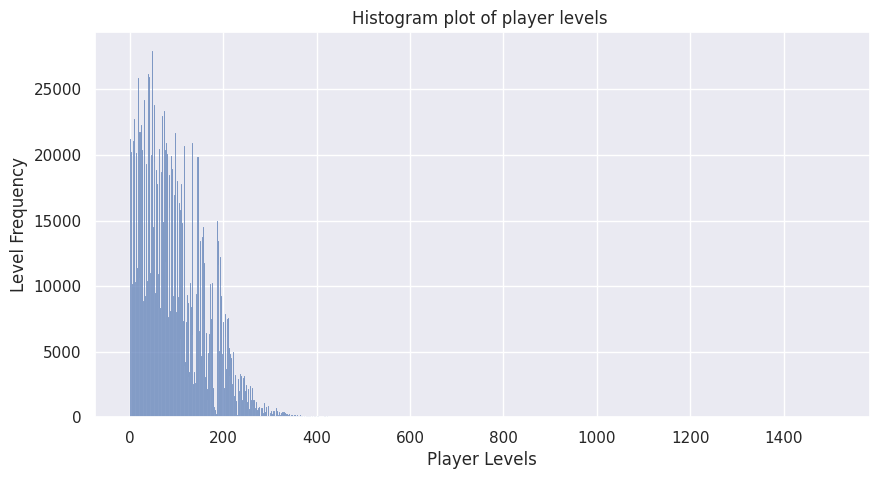

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df, x="level_id")
plt.title("Histogram plot of player levels ")
plt.xlabel("Player Levels")
plt.ylabel("Level Frequency")
plt.show(); plt.close("all")

In [28]:
df.columns

Index(['user_id', 'level_id', 'attempt_result', 'attempt_duration',
       'f_reststep', 'extra_help_used', 'time', 'avg_attempt_duration',
       'avg_clearance_rate', 'avg_clearance_duration', 'avg_num_retries',
       'label'],
      dtype='object')

###Level Outcomes / Resultats de niveau

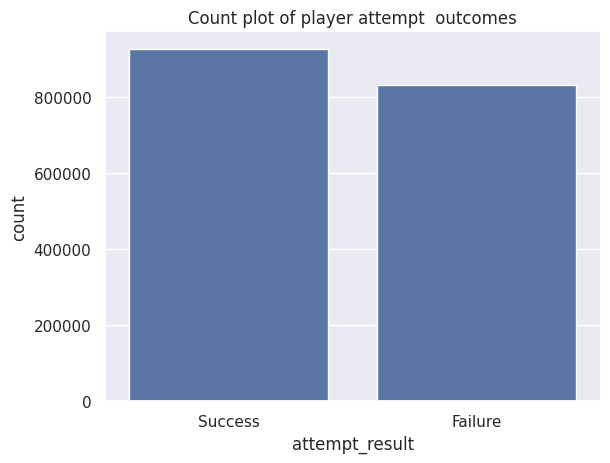

In [29]:
dfy = df['attempt_result'].apply(lambda x : "Success" if x == 1 else "Failure")

sns.countplot(x=dfy)
plt.title("Count plot of player attempt  outcomes")
plt.show(); plt.close("all")

In [30]:
df.columns

Index(['user_id', 'level_id', 'attempt_result', 'attempt_duration',
       'f_reststep', 'extra_help_used', 'time', 'avg_attempt_duration',
       'avg_clearance_rate', 'avg_clearance_duration', 'avg_num_retries',
       'label'],
      dtype='object')

**Average Clearance RATE**

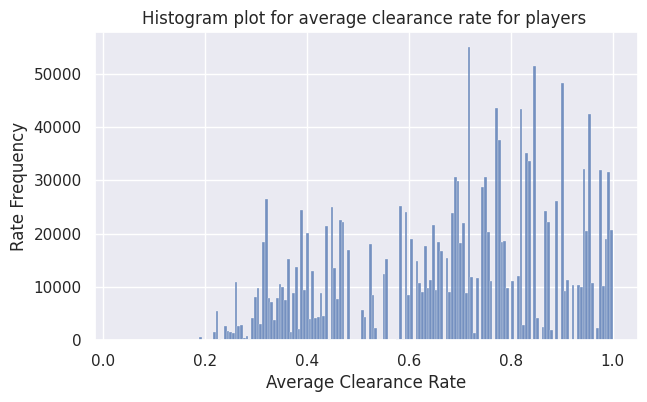

In [31]:
plt.figure(figsize=(7,4))
sns.histplot(df, x="avg_clearance_rate")
plt.title("Histogram plot for average clearance rate for players ")
plt.xlabel("Average Clearance Rate")
plt.ylabel("Rate Frequency")
plt.show(); plt.close("all")

**Average durations for (a.) level attempts and (b.) level clearence**

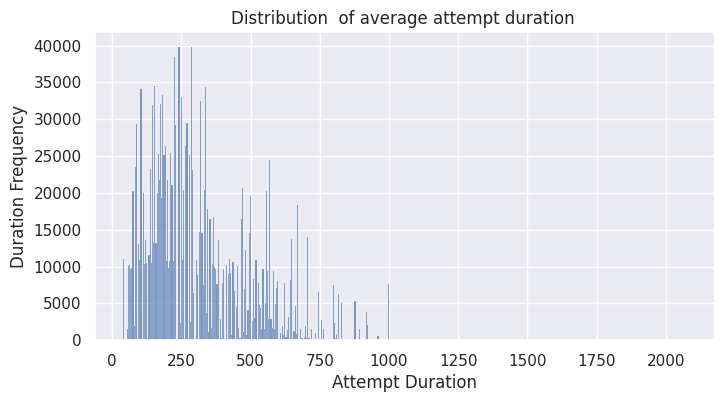

In [32]:
# Distribution of average level attempts duration

plt.figure(figsize=(8,4))

sns.histplot(df, x="avg_attempt_duration")

plt.title("Distribution  of average attempt duration ")

plt.xlabel("Attempt Duration")

plt.ylabel("Duration Frequency")

plt.show(); plt.close("all")

In [33]:
df.columns

Index(['user_id', 'level_id', 'attempt_result', 'attempt_duration',
       'f_reststep', 'extra_help_used', 'time', 'avg_attempt_duration',
       'avg_clearance_rate', 'avg_clearance_duration', 'avg_num_retries',
       'label'],
      dtype='object')

In [34]:
df['avg_attempt_duration'].mean()

311.8494074499335

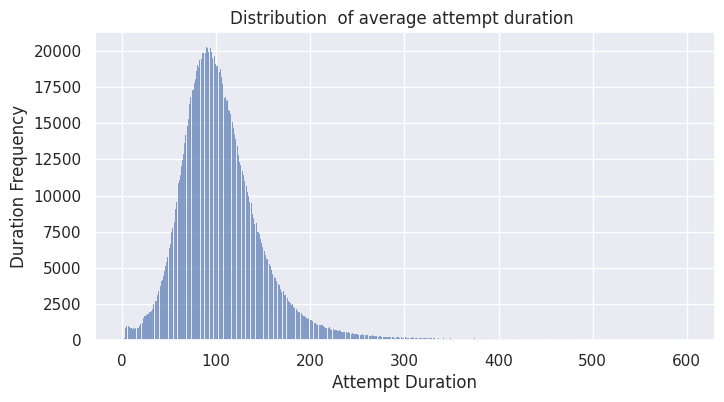

In [35]:
# Distribution of average level attempts duration

plt.figure(figsize=(8,4))

sns.histplot(df, x="attempt_duration")

plt.title("Distribution  of average attempt duration ")

plt.xlabel("Attempt Duration")

plt.ylabel("Duration Frequency")

plt.show(); plt.close("all")

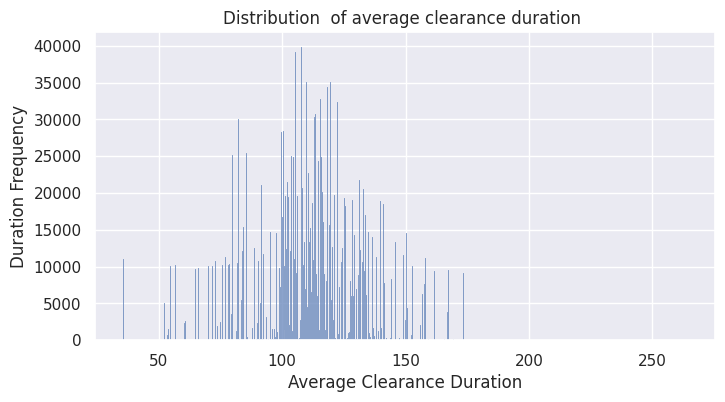

In [36]:
# Distribution of average clearance  duration

plt.figure(figsize=(8,4))

sns.histplot(df, x="avg_clearance_duration")

plt.title("Distribution  of average clearance duration ")

plt.xlabel("Average Clearance Duration")

plt.ylabel("Duration Frequency")

plt.show(); plt.close("all")

In [37]:
df['avg_clearance_duration'].skew()

-0.1832432417879938

**Player Population Over Time**

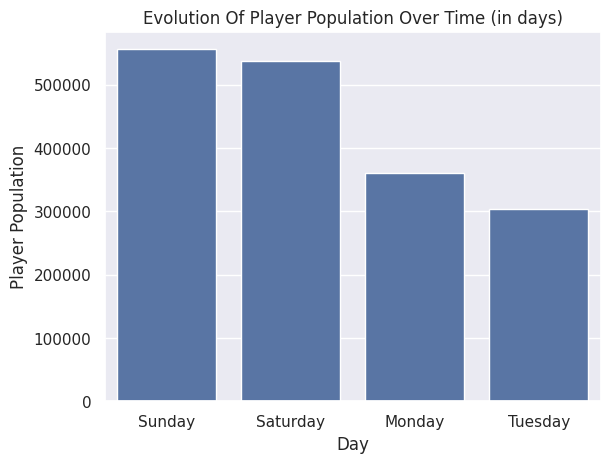

In [38]:
dist_data = df['time'].dt.day_name().value_counts()

sns.barplot(y= dist_data.values, x = dist_data.index.tolist())

plt.xlabel("Day")
plt.ylabel("Player Population")
plt.title("Evolution Of Player Population Over Time (in days)")
plt.show(); plt.close("all")

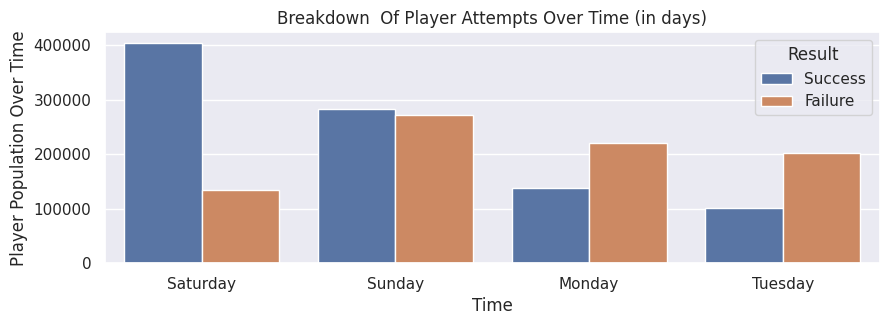

In [39]:
dist_data = pd.DataFrame(
    data = {
        "Time" : df["time"].dt.day_name(),
        "Result" : df["attempt_result"].apply(lambda x : "Success" if x == 1 else "Failure")
    }
)

plt.figure(figsize=(10,3))

sns.countplot(data=dist_data, x="Time", hue="Result")

plt.xlabel("Time")
plt.ylabel("Player Population Over Time" )
plt.title("Breakdown  Of Player Attempts Over Time (in days)")
plt.show(); plt.close("all")

###Player churn category over time / Catégorie de désabonnement des joueurs au fil du temps





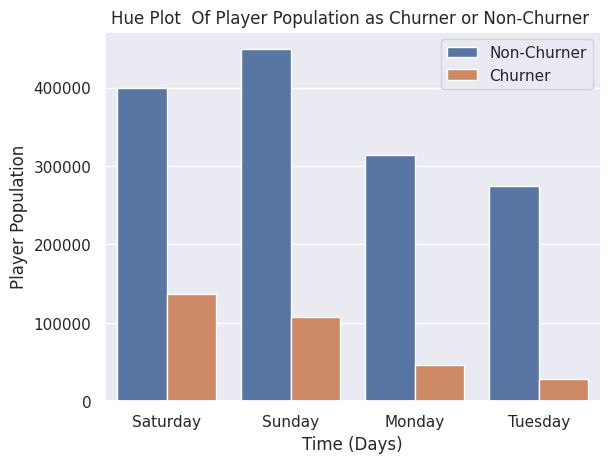

In [40]:
sns.countplot(x = df['time'].dt.day_name(), hue = df['label'].apply(lambda x: "Churner" if x == 1 else "Non-Churner").values)

plt.title("Hue Plot  Of Player Population as Churner or Non-Churner ")
plt.xlabel("Time (Days)")
plt.ylabel("Player Population")
plt.show(); plt.close("all")

In [41]:
df.columns


Index(['user_id', 'level_id', 'attempt_result', 'attempt_duration',
       'f_reststep', 'extra_help_used', 'time', 'avg_attempt_duration',
       'avg_clearance_rate', 'avg_clearance_duration', 'avg_num_retries',
       'label'],
      dtype='object')

###Average duration for (a.) level clearance and (b.) level attempts per game levels / Durée moyenne pour (a.) le dégagement de niveau et (b.) les tentatives de niveau par niveau de jeu

###Average duration for  level clearance  / Durée moyenne du dégagement de niveau

In [42]:
#ce code calcule la durée moyenne de dégagement pour chaque niveau dans le jeu,
clearance_duration = df.groupby('level_id')['avg_clearance_duration'].mean()

In [43]:
clearance_duration

level_id
1        35.582757
2        56.715706
3        71.789943
4        54.842882
5        85.650547
           ...    
1505    133.625000
1506    115.906250
1507     86.250000
1508    164.000000
1509    106.833333
Name: avg_clearance_duration, Length: 1295, dtype: float64

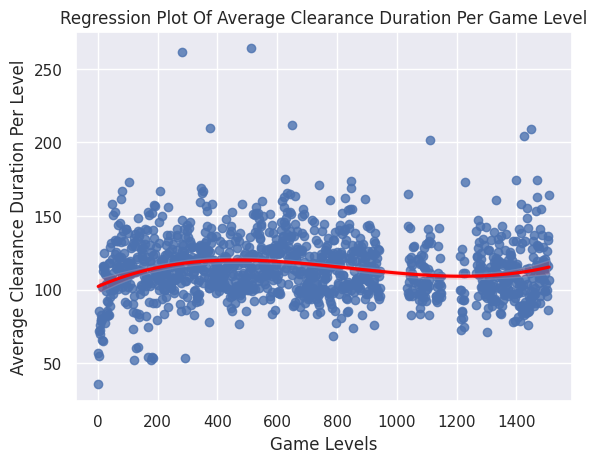

In [44]:
sns.regplot(x= clearance_duration.index, y= clearance_duration.values, order=3, line_kws={"color": "red"})

plt.xlabel("Game Levels")
plt.ylabel("Average Clearance Duration Per Level")
plt.title("Regression Plot Of Average Clearance Duration Per Game Level")
plt.show(); plt.close("all")

###level attempts per game levels /les tentatives de niveau par niveau de jeu


In [45]:

#Ce code calcule la durée moyenne des tentatives pour chaque niveau
attempt_duration = df.groupby('level_id')['avg_attempt_duration'].mean()

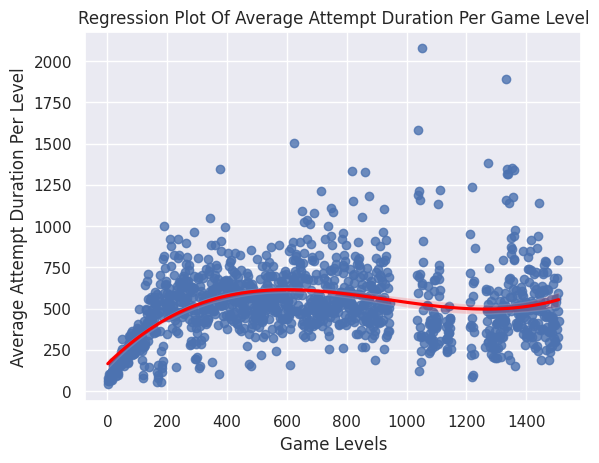

In [46]:
sns.regplot(x= attempt_duration.index, y= attempt_duration.values, order=3, line_kws={"color": "red"})

plt.xlabel("Game Levels")
plt.ylabel("Average Attempt Duration Per Level")
plt.title("Regression Plot Of Average Attempt Duration Per Game Level")
plt.show(); plt.close("all")

###Average duration with respect to attempt outcome / Durée moyenne par rapport au résultat de la tentative

In [47]:
#Ce code calcule la durée moyenne des tentatives réussies par niveau de jeu
success_attempt_duration = df.query("attempt_result == 1").groupby('level_id')['avg_attempt_duration'].mean()

##Ce code calcule la durée moyenne des tentatives échouées par niveau de jeu
failure_attempt_duration = df.query("attempt_result == 0").groupby('level_id')['avg_attempt_duration'].mean()

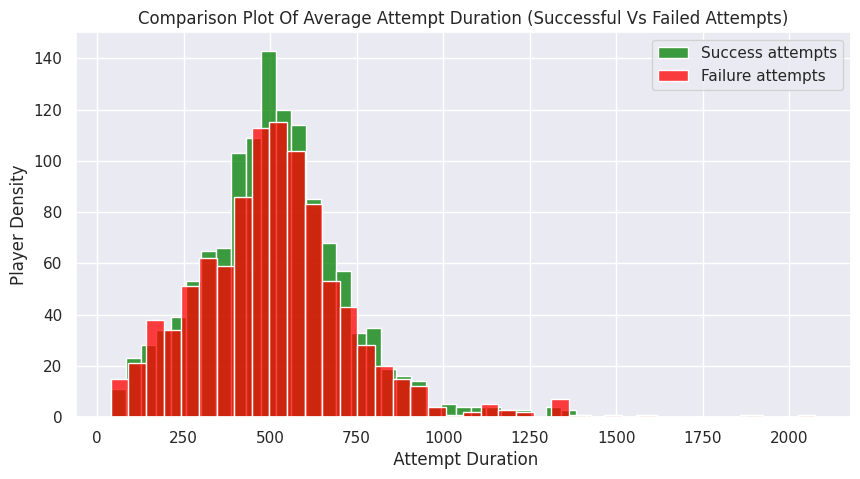

In [48]:
plt.figure(figsize=(10,5))

sns.histplot(success_attempt_duration, label="Success attempts", color="green")
sns.histplot(failure_attempt_duration, label="Failure attempts", color="red")

plt.title("Comparison Plot Of Average Attempt Duration (Successful Vs Failed Attempts)")
plt.xlabel(" Attempt Duration")
plt.ylabel("Player Density")
plt.legend()
plt.show(); plt.close("all")

###Churn (a.)counts and (b.) rates per game level

**What levels of the game see the most churn from the players **

To answer to this question, we will compare :    



1.   Game level with churn population at that level , and

2.   Game level and churn rate at that level



In [49]:
# group by level and get the sum  of churn labels
churn_count_per_label = df.groupby('level_id')['label'].sum()

In [50]:
churn_count_per_label

level_id
1       3792.0
2       3470.0
3       3428.0
4       3359.0
5       3646.0
         ...  
1505       0.0
1506       0.0
1507       0.0
1508       0.0
1509       0.0
Name: label, Length: 1295, dtype: float64

In [51]:
max_churn_level = churn_count_per_label.max()

In [52]:
max_churn_level

4458.0

In [53]:
# niveau du jeu ou le maximum de joueurs se desabonnent
levels_with_max_churn = churn_count_per_label[churn_count_per_label == max_churn_level].index.tolist()

In [54]:
levels_with_max_churn

[14]

In [55]:
# Top 10 levels with the largest churned population

max_churn_population = churn_count_per_label.nlargest(10)

In [56]:
max_churn_population


level_id
14    4458.0
18    3866.0
1     3792.0
10    3768.0
19    3739.0
8     3653.0
5     3646.0
32    3547.0
11    3534.0
2     3470.0
Name: label, dtype: float64

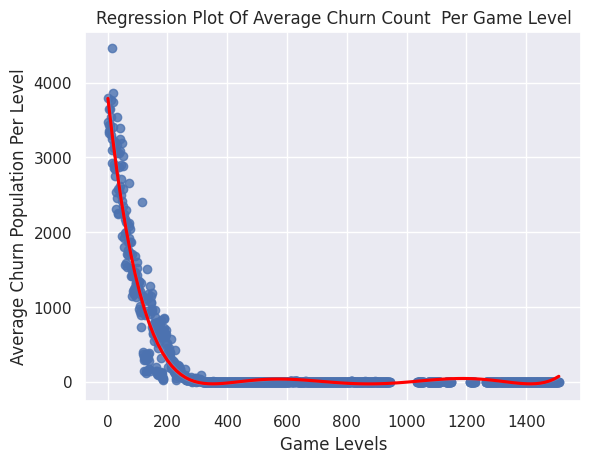

In [57]:
# Visualize churn population per level

sns.regplot(x= churn_count_per_label.index, y= churn_count_per_label.values, order=6, line_kws={"color": "red"})

plt.xlabel("Game Levels")
plt.ylabel("Average Churn Population Per Level")
plt.title("Regression Plot Of Average Churn Count  Per Game Level")
plt.show(); plt.close("all")

In [58]:
# group by level and get the mean  of churn labels
churn_rate_per_label = df.groupby('level_id')['label'].mean()

In [59]:
churn_rate_per_label

level_id
1       0.345418
2       0.338603
3       0.338100
4       0.332970
5       0.335820
          ...   
1505    0.000000
1506    0.000000
1507    0.000000
1508    0.000000
1509    0.000000
Name: label, Length: 1295, dtype: float64

In [60]:
# Maximun churn rate
max_churn_rate = churn_rate_per_label.max()

In [61]:
max_churn_rate

0.875

In [62]:
# Level with max churn rate
max_level_churn_rate = churn_rate_per_label[churn_rate_per_label == max_churn_rate]

In [63]:
max_level_churn_rate

level_id
817    0.875
Name: label, dtype: float64

In [64]:
# Top 10 levels with highest churn rate
churn_rate_per_label.nlargest(10)

level_id
817    0.875000
814    0.833333
815    0.750000
629    0.666667
661    0.666667
664    0.666667
816    0.666667
619    0.615385
622    0.571429
631    0.571429
Name: label, dtype: float64

In [65]:
# Top 10 levels with lowest churn rate
churn_rate_per_label.nsmallest(10)

level_id
295    0.0
318    0.0
319    0.0
320    0.0
321    0.0
322    0.0
323    0.0
324    0.0
325    0.0
326    0.0
Name: label, dtype: float64

In [66]:
# levels with max churn rate
max_churn_rate_levels = churn_rate_per_label.nlargest(10).index.tolist()

In [67]:
max_churn_rate_levels

[817, 814, 815, 629, 661, 664, 816, 619, 622, 631]

In [68]:
# Rate of churn with levels that have the high churn population
churn_rate_per_label.loc[max_churn_population.index]

level_id
14    0.326761
18    0.294912
1     0.345418
10    0.326885
19    0.292201
8     0.338837
5     0.335820
32    0.249930
11    0.314105
2     0.338603
Name: label, dtype: float64

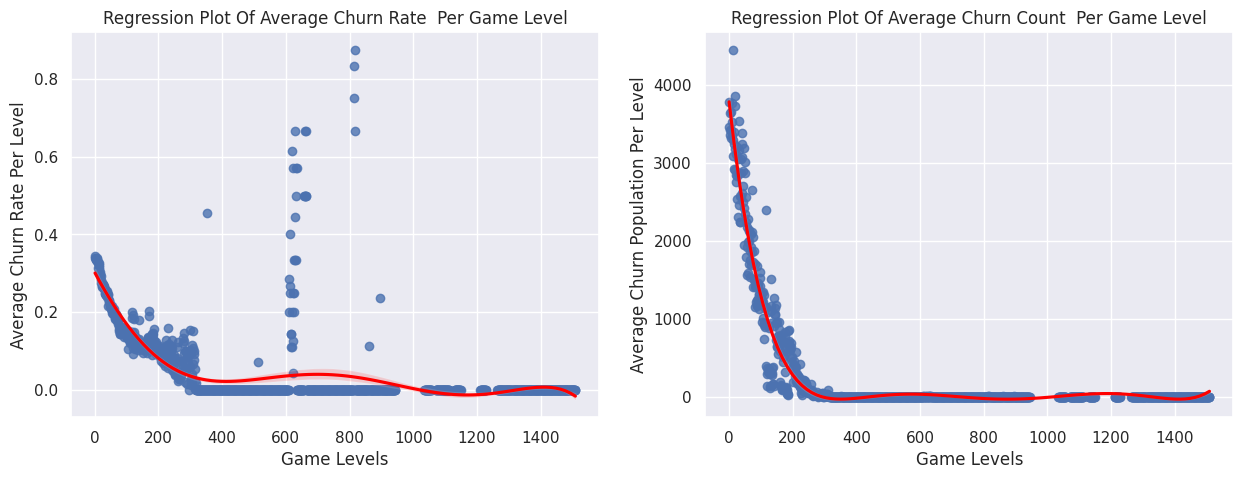

In [69]:
# Visualize churn rate per level

fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=False)


sns.regplot(x= churn_rate_per_label.index, y= churn_rate_per_label.values, order=6, ax=ax[0], line_kws={"color": "red"})

ax[0].set_xlabel("Game Levels")
ax[0].set_ylabel("Average Churn Rate Per Level")
ax[0].set_title("Regression Plot Of Average Churn Rate  Per Game Level")


# Visualize churn population per level

sns.regplot(x= churn_count_per_label.index, y= churn_count_per_label.values, ax=ax[1], order=6, line_kws={"color": "red"})

ax[1].set_xlabel("Game Levels")
ax[1].set_ylabel("Average Churn Population Per Level")
ax[1].set_title("Regression Plot Of Average Churn Count  Per Game Level")
plt.show(); plt.close("all")

In [70]:
# obtain the data for levels with high churn rate

subdata = df.loc[df['level_id'].isin(max_churn_rate_levels)]

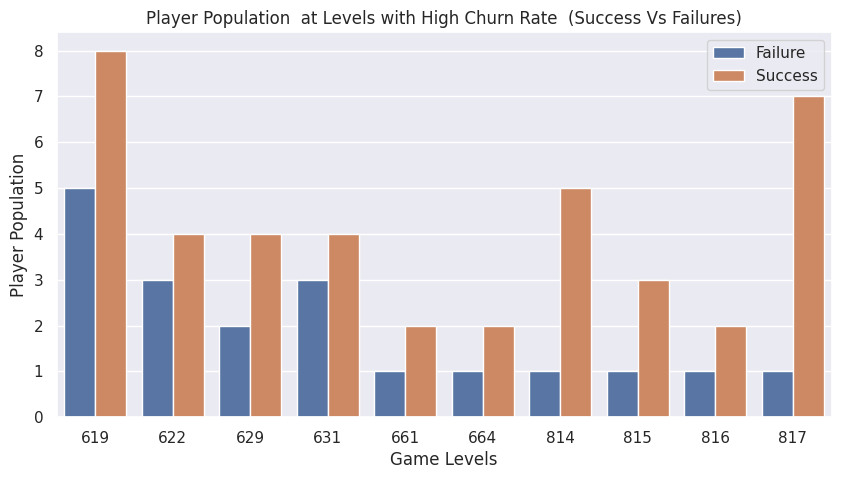

In [71]:
# visualize the levels and the  results of attempting those levels

plt.figure(figsize=(10,5))

sns.countplot(x=subdata['level_id'], hue=subdata['label'].apply(lambda x: "Success" if x == 1 else "Failure").values)

plt.xlabel("Game Levels")
plt.ylabel("Player Population")
plt.title("Player Population  at Levels with High Churn Rate  (Success Vs Failures)")
plt.show(); plt.close("all")

###Label Imbalance

In [72]:
df['label'].value_counts()

label
0.0    1436885
1.0     318790
Name: count, dtype: int64

In [73]:
#renvoyer des proportions au lieu de nombres bruts.
df['label'].value_counts(normalize=True)

label
0.0    0.818423
1.0    0.181577
Name: proportion, dtype: float64

In [74]:
churn_dist = df['label'].value_counts()

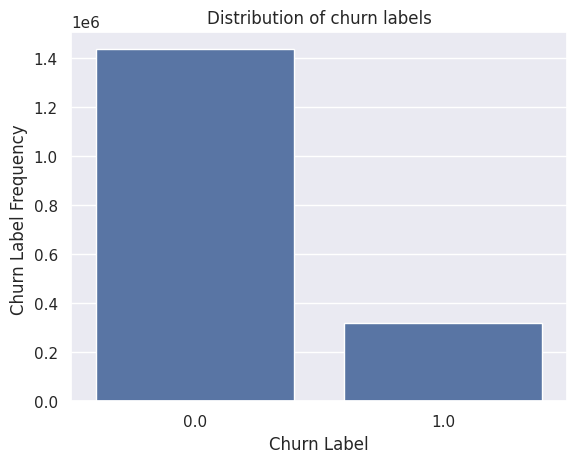

In [75]:
sns.barplot(x=churn_dist.index, y=churn_dist.values)

plt.title("Distribution of churn labels")
plt.xlabel("Churn Label")
plt.ylabel("Churn Label Frequency ")
plt.show(); plt.close("all")

###Feature correlation

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755675 entries, 0 to 1755674
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 int64         
 1   level_id                int64         
 2   attempt_result          int64         
 3   attempt_duration        float64       
 4   f_reststep              float64       
 5   extra_help_used         int64         
 6   time                    datetime64[ns]
 7   avg_attempt_duration    float64       
 8   avg_clearance_rate      float64       
 9   avg_clearance_duration  float64       
 10  avg_num_retries         float64       
 11  label                   float64       
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 160.7 MB


In [77]:
## Generate correlation matrix

correlation_matrix = df.corr(method='pearson')

In [78]:
correlation_matrix

,user_id,level_id,attempt_result,attempt_duration,f_reststep,extra_help_used,time,avg_attempt_duration,avg_clearance_rate,avg_clearance_duration,avg_num_retries,label
user_id,1.000000,-0.024543,0.011090,0.001073,0.019765,-0.003126,0.099607,-0.022750,0.022836,-0.005910,-0.025497,0.003997
level_id,-0.024543,1.000000,-0.351085,-0.017585,-0.277967,-0.006705,0.500528,0.740798,-0.768330,0.263597,0.751353,-0.156240
attempt_result,0.011090,-0.351085,1.000000,-0.072602,0.499999,0.087888,-0.309963,-0.426826,0.479145,-0.239651,-0.410893,0.090530
attempt_duration,0.001073,-0.017585,-0.072602,1.000000,-0.388475,0.155447,0.085863,0.066127,-0.029756,0.379374,-0.056339,-0.028819
f_reststep,0.019765,-0.277967,0.499999,-0.388475,1.000000,-0.056618,-0.285306,-0.345983,0.416026,-0.394046,-0.260471,0.101196
extra_help_used,-0.003126,-0.006705,0.087888,0.155447,-0.056618,1.000000,0.015773,-0.006622,-0.002532,0.042458,-0.015655,0.011804
time,0.099607,0.500528,-0.309963,0.085863,-0.285306,0.015773,1.000000,0.534239,-0.556847,0.251594,0.501720,-0.156885
avg_attempt_duration,-0.022750,0.740798,-0.426826,0.066127,-0.345983,-0.006622,0.534239,1.000000,-0.912709,0.516279,0.910498,-0.158949
avg_clearance_rate,0.022836,-0.768330,0.479145,-0.029756,0.416026,-0.002532,-0.556847,-0.912709,1.000000,-0.416900,-0.901514,0.168082
avg_clearance_duration,-0.005910,0.263597,-0.239651,0.379374,-0.394046,0.042458,0.251594,0.516279,-0.416900,1.000000,0.270722,-0.095981


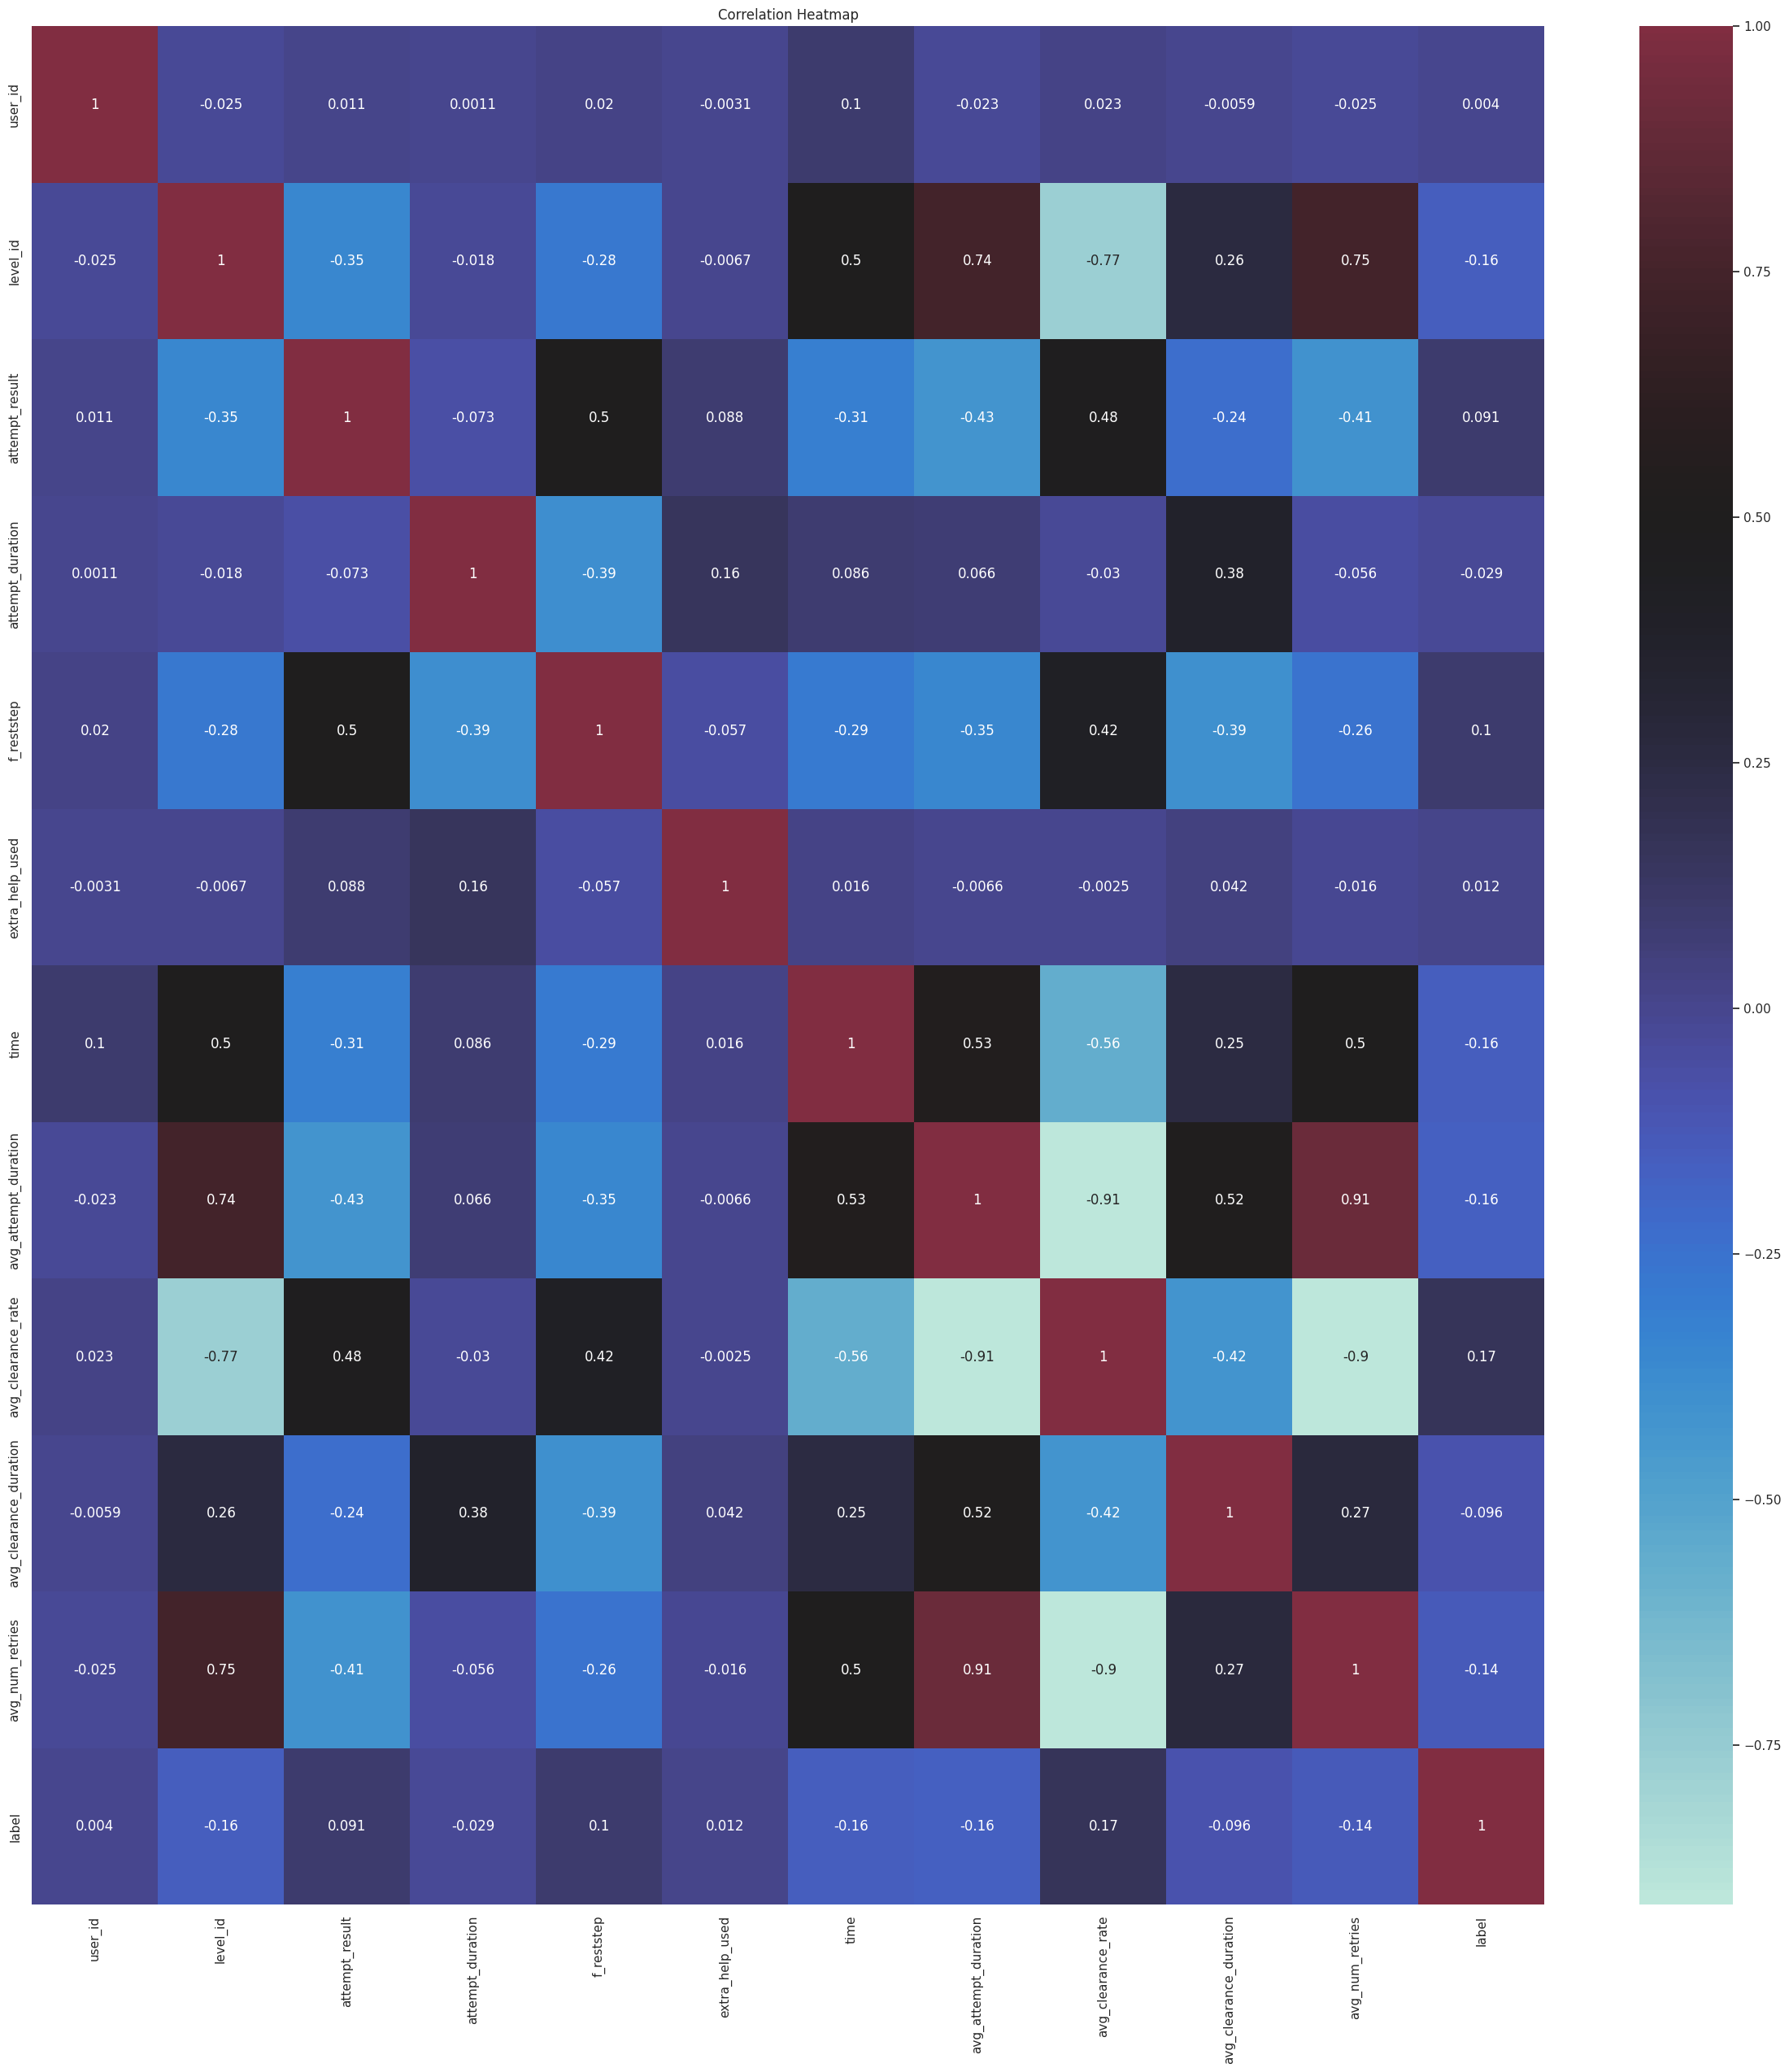

In [79]:
### correlation heatmap

plt.figure(figsize=(30,30))

sns.heatmap(correlation_matrix, annot=True, fmt=".2g", center=.5)

plt.title("Correlation Heatmap")
plt.show(); plt.close("all")

###Data Implications

Implied by our fundings above, we can say the following :    



1.   **Missing Values** : There are no missing values in the  dataset

2.   **Data duplication** : There are no duplicated values in the dataset


3.   **Low cardinality or feature invariance**: There are no invarariant features

4.   **Correlation** For the most part, there are some instances of multilcollinearity. This might require the application of dimentionnality reduction technique


5.   **Categorical features**: There are a few categorical features inthe dataset e.g attempt_result, label, extra_help_used

6.   **Feature scale**: Most of the features in the dataset are  nicely scaled. A few features might require some feature scaling though



###3. Data Preparation

Based on the **Data Implications** discovered prior, the following steps will be experimented upon for the data preparing stage.



1.   **Duplicated Records**: Some of the records are duplicated. These might need to be eliminated


2.   **Feature & Targets**: Obtain the features and targets


3.   **Split Data**: Split the data into train and test sets


4.   **Fix Label Imbalance**: Fix the imbalance between our  labels



In [80]:
# check effects of eliminating duplicates
df.drop_duplicates()['label'].value_counts(normalize=True)

label
0.0    0.818676
1.0    0.181324
Name: proportion, dtype: float64

In [81]:
df['label'].value_counts(normalize=True)

label
0.0    0.818423
1.0    0.181577
Name: proportion, dtype: float64

In [82]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [83]:
# Gargage Collect
gc.collect()

116771

In [84]:
# Targets and features
y = df['label']
X = df.drop(labels=['label', 'user_id', 'time'], axis=1)

In [85]:
X.head()

,level_id,attempt_result,attempt_duration,f_reststep,extra_help_used,avg_attempt_duration,avg_clearance_rate,avg_clearance_duration,avg_num_retries
0,1,1,127.0,0.500000,0,39.889940,0.944467,35.582757,0.017225
1,2,1,69.0,0.703704,0,60.683975,0.991836,56.715706,0.004638
2,3,1,67.0,0.560000,0,76.947355,0.991232,71.789943,0.004480
3,4,1,58.0,0.700000,0,58.170347,0.993843,54.842882,0.004761
4,5,1,83.0,0.666667,0,101.784577,0.954170,85.650547,0.027353


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# train ,test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [88]:
X_train.shape

(1189874, 9)

In [89]:
X_test.shape

(509946, 9)

###4. Data Modeling

Models of interest



1.   CatBoost

2.   Logistic Regression

3.   XGBoost





In [90]:
!pip install catboost
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from imblearn.combine import SMOTETomek

In [91]:
'''def get_pipeline(model, params, num_components =15):
  transformer = ColumnTransformer(
      transformers = [
          ("scaler", StandardScaler(), [2,5,7])
      ],
      remainder = "passthrough"
  )

  model = Pipeline(
      steps = [
      ("transformer", transformer),
      ("PCA", PCA(n_components=num_components)),
      ("model", model)
  ])

  return model'''

'def get_pipeline(model, params, num_components =15):\n  transformer = ColumnTransformer(\n      transformers = [\n          ("scaler", StandardScaler(), [2,5,7])\n      ],\n      remainder = "passthrough"\n  )\n\n  model = Pipeline(\n      steps = [\n      ("transformer", transformer),\n      ("PCA", PCA(n_components=num_components)),\n      ("model", model)\n  ])\n\n  return model'

In [92]:
def get_pipeline(model, params, num_components=15):  # Définition de la fonction avec trois paramètres : model, params, et num_components (valeur par défaut de 15)

  # Définition du transformateur de colonnes
  transformer = ColumnTransformer(
      transformers=[  # Liste des transformateurs à appliquer
          ("scaler", StandardScaler(), [2, 5, 7])  # Application du StandardScaler aux colonnes d'index 2, 5, et 7
      ],
      remainder="passthrough"  # Les autres colonnes sont passées sans transformation
  )

  # Définition du pipeline
  model = Pipeline(
      steps=[  # Liste des étapes du pipeline
          ("transformer", transformer),  # Première étape : appliquer le transformateur défini précédemment

          ("features", PolynomialFeatures(interaction_only = True)), # Deuxième étape : appliquer les features polynomiales

          ("PCA", PCA(n_components=num_components)),  # Deuxième étape : appliquer PCA pour réduire la dimensionnalité à num_components

          ("model", model(**params))  # Troisième étape : appliquer le modèle d'apprentissage automatique fourni en paramètre
      ]
  )

  return model  # Retourne le pipeline complet


In [93]:
# Model hypetrparameters

'''log_params = dict(max_iter=10000)

cat_params = dict(
    iterations =1000,
    learning_rate = .01,
    max_depth = 5,
    leaf_reg = 4.,
    sampling_frequency = "PerTree",
    task_type = "GPU"

)


xgb_params = dict(
    device = "cuda",
    n_estimators=1500,
    max_depth= 3,
    colsample_bytree= 0.8,
    subsample = .7,
    tree_method = "hist",
    scale_pos_weight = 20,
    ransom_state = 42,
    seed = 42
)'''

'log_params = dict(max_iter=10000)\n\ncat_params = dict(\n    iterations =1000,\n    learning_rate = .01,\n    max_depth = 5,\n    leaf_reg = 4.,\n    sampling_frequency = "PerTree",\n    task_type = "GPU"\n\n)\n\n\nxgb_params = dict(\n    device = "cuda",\n    n_estimators=1500,\n    max_depth= 3,\n    colsample_bytree= 0.8,\n    subsample = .7,\n    tree_method = "hist",\n    scale_pos_weight = 20,\n    ransom_state = 42,\n    seed = 42\n)'

In [94]:
# Model hyperparameters

# Hyperparamètres pour un modèle de régression logistique
log_params = dict(
    max_iter=10000  # Nombre maximal d'itérations pour que l'algorithme converge
)

# Hyperparamètres pour un modèle CatBoost
cat_params = dict(
    iterations=1000,          # Nombre d'itérations ou d'arbres à entraîner
    learning_rate=.01,        # Taux d'apprentissage, détermine la taille des étapes vers la solution optimale
    max_depth=5,              # Profondeur maximale des arbres de décision
    l2_leaf_reg=4.,              # Coefficient de régularisation des feuilles, aide à éviter le surapprentissage
    sampling_frequency="PerTree",  # Fréquence d'échantillonnage des données pour la construction des arbres
    task_type="GPU"           # Utilisation du GPU pour accélérer l'entraînement
)

# Hyperparamètres pour un modèle XGBoost
xgb_params = dict(
    device="cuda",            # Utilisation du GPU via CUDA pour accélérer l'entraînement
    n_estimators=1500,        # Nombre d'arbres à entraîner
    max_depth=3,              # Profondeur maximale des arbres
    colsample_bytree=0.8,     # Fraction de colonnes à échantillonner pour chaque arbre
    subsample=.7,             # Fraction de l'ensemble de données à échantillonner pour chaque arbre
    tree_method="hist",       # Méthode de construction des arbres utilisant des histogrammes pour accélérer l'entraînement
    scale_pos_weight=20,      # Balance les classes déséquilibrées en augmentant le poids des classes positives
    ransom_state=42,          # Probable faute de frappe, devrait être random_state, fixe la graine pour la reproductibilité
    seed=42                   # Fixe la graine pour la reproductibilité des résultats
)


In [95]:
# instanciate models

cat_model = get_pipeline(CatBoostClassifier, cat_params)
log_model = get_pipeline(LogisticRegression, log_params)
xgb_model = get_pipeline(XGBClassifier, xgb_params)

In [96]:
# Fit logistic Regression Model
log_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [2, 5, 7])])),
                ('features', PolynomialFeatures(interaction_only=True)),
                ('PCA', PCA(n_components=15)),
                ('model', LogisticRegression(max_iter=10000))])

In [97]:
#!pip install catboost[gpu]
!pip uninstall catboost-gpu

In [98]:
# Fit CastBoost Model
cat_model.fit(X_train, y_train)

0:	learn: 0.6877953	total: 29ms	remaining: 29s
1:	learn: 0.6825636	total: 48ms	remaining: 23.9s
2:	learn: 0.6774304	total: 67ms	remaining: 22.3s
3:	learn: 0.6724209	total: 85.9ms	remaining: 21.4s
4:	learn: 0.6675209	total: 105ms	remaining: 20.8s
5:	learn: 0.6627355	total: 124ms	remaining: 20.5s
6:	learn: 0.6580832	total: 162ms	remaining: 22.9s
7:	learn: 0.6535131	total: 180ms	remaining: 22.4s
8:	learn: 0.6490364	total: 199ms	remaining: 21.9s
9:	learn: 0.6446923	total: 218ms	remaining: 21.6s
10:	learn: 0.6404341	total: 240ms	remaining: 21.6s
11:	learn: 0.6362683	total: 259ms	remaining: 21.4s
12:	learn: 0.6322127	total: 277ms	remaining: 21s
13:	learn: 0.6282398	total: 291ms	remaining: 20.5s
14:	learn: 0.6243715	total: 305ms	remaining: 20.1s
15:	learn: 0.6205683	total: 321ms	remaining: 19.8s
16:	learn: 0.6168670	total: 336ms	remaining: 19.4s
17:	learn: 0.6132291	total: 350ms	remaining: 19.1s
18:	learn: 0.6096786	total: 364ms	remaining: 18.8s
19:	learn: 0.6062027	total: 378ms	remaining: 18

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [2, 5, 7])])),
                ('features', PolynomialFeatures(interaction_only=True)),
                ('PCA', PCA(n_components=15)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7a4c6f950310>)])

In [99]:
!nvidia-smi

Sat Jul 13 18:05:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0              34W /  70W |    105MiB / 15360MiB |     30%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [100]:
# Fit XGBoost Model
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:05:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "ransom_state" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [2, 5, 7])])),
                ('features', PolynomialFeatures(interaction_only=True)),
                ('PCA', PCA(n_components=15)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1500, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

###5. Model Evaluation

Metrics of interest


1.   Accuracy

2.   Precision

3.   Recall

4.   F1 score

5.   AUC ROC



In [107]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, roc_auc_score

In [108]:
def test_model(model, data_, report=False):
  train , test = data_
  X_train, y_train = train
  X_test, y_test = test

  if report:
    train_core = classification_report(y_train, model.predict(X_train))
    test_core = classification_report(y_test, model.predict(X_test))

    print("="*30, "Train Report", "="*30, "\n")
    print(train_core)

    print("="*30, "Test Report", "="*30, "\n")
    print(test_core)

    return

  else:
    train_score = roc_auc_score(y_train, model.predict(X_train))
    test_score = roc_auc_score(y_test, model.predict(X_test))

    return pd.DataFrame(
        data = {
            "Train": [100 * train_score],
            "Test": [100 * test_score],
            "Error (%)": [100 * (train_score - test_score)]
        }
    )

In [109]:
#Accumulate data for testing

data_ = [
    (X_train, y_train),
    (X_test, y_test)
]


In [110]:
gc.collect()

0

In [111]:
# Test Logistic Regression Model
test_model(model = log_model, data_ = data_, report=False)

,Train,Test,Error (%)
0,50.0,50.0,0.0


In [112]:
# Test CatBoost Model
test_model(model = cat_model, data_ = data_, report=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

============================== Train Report ============================== 

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    974121
         1.0       0.00      0.00      0.00    215753

    accuracy                           0.82   1189874
   macro avg       0.41      0.50      0.45   1189874
weighted avg       0.67      0.82      0.74   1189874

============================== Test Report ============================== 

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    417480
         1.0       0.00      0.00      0.00     92466

    accuracy                           0.82    509946
   macro avg       0.41      0.50      0.45    509946
weighted avg       0.67      0.82      0.74    509946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
# Test XGBoost Model
test_model(model = xgb_model, data_ = data_, report=False)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:08:07] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


,Train,Test,Error (%)
0,51.721375,51.371228,0.350148


###Observation


As can be seen here, the performance of the most of the churn prediction models is very close to random, which we can very well do on our own already. The best performing model is the **XGBoost** model. To justify the use of the model, we may need to improve its performance in some way.

###Hyperparametric Optimization


To better improve the model performance and generalization errors, we can attempt to optimize the parameters of **XGBoost** model. In addition, we will account for label imbalance

In [115]:
!pip install optuna
import optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.1 MB/s eta 0:00:00


In [121]:
def objective(trial):
  # Définition du transformateur de colonnes
  transformer = ColumnTransformer(
      transformers=[  # Liste des transformateurs à appliquer
          ("scaler", StandardScaler(), [2, 5, 7])  # Application du StandardScaler aux colonnes d'index 2, 5, et 7
      ],
      remainder="passthrough"  # Les autres colonnes sont passées sans transformation
  )


  # Hyperparamètres pour un modèle XGBoost
  xgb_params = dict(
      device="cuda",            # Utilisation du GPU via CUDA pour accélérer l'entraînement
      n_estimators=1500,        # Nombre d'arbres à entraîner
      max_depth=6,              # Profondeur maximale des arbres
      subsample=1.,             # Fraction de l'ensemble de données à échantillonner pour chaque arbre
      tree_method="gpu_hist",       # Méthode de construction des arbres utilisant des histogrammes pour accélérer l'entraînement
      scale_pos_weight=20,      # Balance les classes déséquilibrées en augmentant le poids des classes positives
      ransom_state=42,          # Probable faute de frappe, devrait être random_state, fixe la graine pour la reproductibilité
      seed=42  ,                 # Fixe la graine pour la reproductibilité des résultats
      learning_rate = trial.suggest_float("learning_rate", 0.3, 0.9, step = .05 ),
      reg_lambda = trial.suggest_float("reg_lambda", 3., 6., step = 1.),
  )

  # Définition du pipeline
  model = Pipeline(
      steps=[  # Liste des étapes du pipeline
          ("transformer", transformer),  # Première étape : appliquer le transformateur défini précédemment

          ("features", PolynomialFeatures(interaction_only = True)), # Deuxième étape : appliquer les features polynomiales

          ("PCA", PCA(n_components=15)),  # Deuxième étape : appliquer PCA pour réduire la dimensionnalité à num_components

          ("model", XGBClassifier(**xgb_params))  # Troisième étape : appliquer le modèle d'apprentissage automatique fourni en paramètre
      ]
  )

  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  score = roc_auc_score(y_test, predictions)

  return score



In [119]:
# Instantiate a study
study = optuna.create_study(direction="maximize")



[I 2024-07-13 18:36:45,063] A new study created in memory with name: no-name-c8c21019-582c-4884-bb71-08dcd8b9680d


In [120]:
# Number of optimization attempts
n_trials = 10

In [123]:
# Run optimization process
study.optimize(func = objective, n_trials=n_trials)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:41:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:41:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "ransom_state" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:41:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-07-13 18:41:20,997] Trial 0 finished with value: 0.5385551568415347 and parameters: {'learning_rate': 0.35, 'reg_

In [124]:
study.best_params

{'learning_rate': 0.7, 'reg_lambda': 4.0}

In [127]:
def build_model(best_params):
  # Définition du transformateur de colonnes
  transformer = ColumnTransformer(
      transformers=[  # Liste des transformateurs à appliquer
          ("scaler", StandardScaler(), [2, 5, 7])  # Application du StandardScaler aux colonnes d'index 2, 5, et 7
      ],
      remainder="passthrough"  # Les autres colonnes sont passées sans transformation
  )


  # Hyperparamètres pour un modèle XGBoost
  xgb_params = dict(
      device="cuda",            # Utilisation du GPU via CUDA pour accélérer l'entraînement
      n_estimators=1500,        # Nombre d'arbres à entraîner
      max_depth=6,              # Profondeur maximale des arbres
      subsample=1.,             # Fraction de l'ensemble de données à échantillonner pour chaque arbre
      tree_method="gpu_hist",       # Méthode de construction des arbres utilisant des histogrammes pour accélérer l'entraînement
      scale_pos_weight=20,      # Balance les classes déséquilibrées en augmentant le poids des classes positives
      ransom_state=42,          # Probable faute de frappe, devrait être random_state, fixe la graine pour la reproductibilité
      seed=42  ,                 # Fixe la graine pour la reproductibilité des résultats

  )

  for k, v in best_params.items():
    xgb_params[k] = v


  # Définition du pipeline
  model = Pipeline(
      steps=[  # Liste des étapes du pipeline
          ("transformer", transformer),  # Première étape : appliquer le transformateur défini précédemment

          ("features", PolynomialFeatures(interaction_only = True)), # Deuxième étape : appliquer les features polynomiales

          ("PCA", PCA(n_components=15)),  # Deuxième étape : appliquer PCA pour réduire la dimensionnalité à num_components

          ("model", XGBClassifier(**xgb_params))  # Troisième étape : appliquer le modèle d'apprentissage automatique fourni en paramètre
      ]
  )


  return model



In [128]:
# Build optimal model
best_model = build_model(study.best_params)

In [129]:
# Train optimal model
best_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:56:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:56:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "ransom_state" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [2, 5, 7])])),
                ('features', PolynomialFeatures(interaction_only=True)),
                ('PCA', PCA(n_components=15)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.7,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1500, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [130]:
# Test model
test_model(model = best_model, data_ = data_, report=True)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:02:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


============================== Train Report ============================== 

              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40    974121
         1.0       0.23      1.00      0.37    215753

    accuracy                           0.38   1189874
   macro avg       0.61      0.62      0.38   1189874
weighted avg       0.86      0.38      0.39   1189874

============================== Test Report ============================== 

              precision    recall  f1-score   support

         0.0       0.88      0.22      0.35    417480
         1.0       0.20      0.87      0.32     92466

    accuracy                           0.34    509946
   macro avg       0.54      0.54      0.34    509946
weighted avg       0.76      0.34      0.35    509946



In [131]:
# Test model
test_model(model = best_model, data_ = data_, report=False)

,Train,Test,Error (%)
0,62.293552,54.285431,8.008121


<hr> </hr>

###Recommandations base on Data Understanding and Model Optimization

<hr> </hr>

<h3> Recommendations : Data Understanding </h3>

Based on **Data Understanding** process, a few recommendations can be made:

1.  Some levels are missing from the game . THis might be due to
      .    Errors in the data collection process
      .    Bugs in the game that allow players skip levels, etcetera.

2.  The churn rate of players at mid-tier levels of the game (600-850) are alarming  i.e, up to 87% churn rate are observed. **GameHaven** needs to look into this. Possible strategies to alleviate the problem may include:

      .   Moderating game difficulty

      .   Provision of extra incentives to players

3.  Player participation is at its highest over the weekends and drops during weekdays. **GameHaven** can come up with stategies to encourage player participation both of weekend and weekdays.

4.  The dataset only contains  records for the first four days of the game launch A more holistic  view of the situation can be obtained if **GameHaven** can accumulate more data


<hr>  </hr>



<h3> Recommendations: Hyperparametric Optimization  </h3>


Based on our final observations from the optimization process, we have been able to improve the models. Howeverm we dit this at the cost of the generalization error. The possible issues and attendant recommendations are made below:

**1.  Hyperparametric range** : Future optimization attempts can focus on optimizing the hyperparameters within  the right ranges.

**2.  Right hyperparameters** : It is possible that not all the right hyperparameters were being optimized. Future attempts can focus on exploring the optimization of other hyperparametric settings

**3.  Number of optimization trials** : In this iteration, we focused on optimizing for a small number of trials (10). This was due to time constraints. With the benefit of more time, future attempts  can increase this limit

**4.  Temporal features** : The time feature could have been used to generate other temporal features, which might  have been of value to the learning process. This would however have strained our computational budget, and taken more compute time, **GameHaven** can look into securing more compute for the next iteration  of this project